# Supervised problem: experiments with optimization

I will build a small supervised problem to experiment with optimizers using Feed Forward Neural Networks

In [1]:
## routine needed to run the notebook on Google Colab
try:
    import google.colab

    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    !pip install "pina-mathlab[tutorial]"

import warnings
import torch
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

from pina import Trainer
from pina.model import FeedForward
from pina.domain import CartesianDomain
from pina.solver import SupervisedSolver

## Problem Building

I will build the same problem of the tutorial20 [Supervised Learning Tutorial](https://mathlab.github.io/PINA/tutorial20/tutorial.html)


In [22]:
def generate_sdf_data(num_points=1000000, radius=1.0, cube_bound=1.5):
    # Create the 3D cube
    domain = CartesianDomain(
        {
            "x": [-cube_bound, cube_bound],
            "y": [-cube_bound, cube_bound],
            "z": [-cube_bound, cube_bound],
        }
    )
    # Sample 3D points in cube
    coords = domain.sample(num_points, mode="random").tensor
    # Compute signed distance to the sphere
    sdf = coords.norm(dim=-1, keepdim=True) - radius  # ||x|| - r

    return coords, sdf

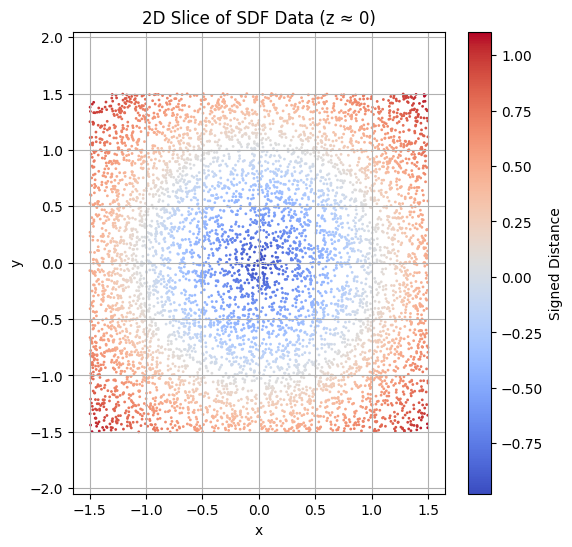

In [23]:
# --- Generate Data ---
coords, sdf = generate_sdf_data()

# --- 2D Slice at z ≈ 0 ---
z_slice_thresh = 0.01  # How close to z=0
mask_2d = coords[:, 2].abs() < z_slice_thresh
coords_2d = coords[mask_2d]
sdf_2d = sdf[mask_2d]

plt.figure(figsize=(6, 6))
plt.scatter(
    coords_2d[:, 0], coords_2d[:, 1], c=sdf_2d.squeeze(), cmap="coolwarm", s=1
)
plt.colorbar(label="Signed Distance")
plt.title("2D Slice of SDF Data (z ≈ 0)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.grid(True)
plt.show()

### Initializing the problem

The [tutorial](https://mathlab.github.io/PINA/tutorial20/tutorial.html) uses SupervisedProblem from pina.problem.zoo. Here I will build the problem myself to get used to the interface 